# EDA

In this project we are looking at the titles and comments from r/SteamDeck and r/linux_gaming. In this notebook we will be exploring the datasets and seeing what information can be gleamed, along with some potential minor cleaning along the way. 

### Imports

In [75]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Library that let's us read emojis using unicode
import emoji

# Color theme stuff
import mplcatppuccin
from mplcatppuccin.colormaps import get_colormap_from_list
from mplcatppuccin.palette import load_color

from sklearn.feature_extraction.text import CountVectorizer

In [76]:
# Allowing more text from the Title and Comments to be shown.
pd.options.display.max_colwidth = 400

In [77]:
# This line is for our plot color schemes down the line.
mpl.style.use("mocha")

In [78]:
# Grabbing the Title data and storing it in a dataframe
titles = pd.read_csv('../data/linux_gaming_SteamDeck_merged_title_data.csv')

# Grabbing the Comment data and storing it in a dataframe
comments = pd.read_csv('../data/linux_gaming_SteamDeck_merged_comment_data.csv')

In [79]:
titles.head()

,title_id,title,subreddit
0,12ysmfy,Improved Wine gaming with exeCute,linux_gaming
1,12yb3qz,There is a lot of native Linux games. What would you recomend?,linux_gaming
2,12yfibp,What is your favorite open source Linux game? Mine is Wideland (Best way to describe is the way Settlers 3 should have been),linux_gaming
3,12yagh3,Wiki is getting attacked by spam bots!,linux_gaming
4,12yg5qp,PSA: the 8bitdo ultimate (bluetooth + 2.4gz) controller doesn't work out of the box on most linux distributions,linux_gaming


In [80]:
comments.head()

,comment_id,comments,subreddit
0,jhjsr22,I’m sorry you lost all your friends from gaming too much,SteamDeck
1,jhjz43t,"This feels like an all too poignant commentary on my life. A bunch of games, no friends and no money.",SteamDeck
2,jhjtkl6,"I also have 0,00 Money!",SteamDeck
3,jhjrdnr,I was worried your friend count had gone up. It was only that your games quadrupled. Whew!,SteamDeck
4,jhk1d07,Haha. I honestly thought the 100 referred to cash in the wallet and the joke being about losing 100 friends. Just realised it was about the 100 games. 🤦🏼‍♀️,SteamDeck


Let's look at how much data we have. 

In [81]:
print(titles.shape)

print(comments.shape)

(3113, 3)
(49960, 3)


In [82]:
print(titles['subreddit'].value_counts())
print('-'*30)
print(comments['subreddit'].value_counts())

SteamDeck       1988
linux_gaming    1125
Name: subreddit, dtype: int64
------------------------------
SteamDeck       33995
linux_gaming    15965
Name: subreddit, dtype: int64


### Imbalanced Data
As we can see above, we have a pretty imbalanced set of data, with the majority of our data being from r/SteamDeck, by it representing close to 2/3 of our dataset. This is because the data has been pulled regularly from the Reddit API which limits the amount of posts that can be collected to the the first 1000 posts in the respective category. Gathering data over time by repeatedly hitting the api and dropping duplicates will lead to the more popular and active subreddit getting more data than the other.

Because of this imbalance of data, we will have to be more aware of our various results in through out this study. 

## Looking at lengths
We have a good amount of titles and comments. Let's add length and word count column to get an idea of the individual sizes of the titles and comments. We can then later examine them to help us find patterns between our 2 different subreddits, and to help us spot things that should be cleaned or taken note of for later work. 

In [83]:
# Adding a column for length and word count to both the title set and the comment set.
titles['title_length'] = [len(title) for title in titles['title']]
titles['title_word_count'] = [len(title.split()) for title in titles['title']]

comments['comment_length'] = [len(comment) for comment in comments['comments']]
comments['comment_word_count'] = [len(comment.split()) for comment in comments['comments']]

In [84]:
titles.head()

,title_id,title,subreddit,title_length,title_word_count
0,12ysmfy,Improved Wine gaming with exeCute,linux_gaming,33,5
1,12yb3qz,There is a lot of native Linux games. What would you recomend?,linux_gaming,62,12
2,12yfibp,What is your favorite open source Linux game? Mine is Wideland (Best way to describe is the way Settlers 3 should have been),linux_gaming,124,23
3,12yagh3,Wiki is getting attacked by spam bots!,linux_gaming,38,7
4,12yg5qp,PSA: the 8bitdo ultimate (bluetooth + 2.4gz) controller doesn't work out of the box on most linux distributions,linux_gaming,111,18


In [85]:
comments.head()

,comment_id,comments,subreddit,comment_length,comment_word_count
0,jhjsr22,I’m sorry you lost all your friends from gaming too much,SteamDeck,56,11
1,jhjz43t,"This feels like an all too poignant commentary on my life. A bunch of games, no friends and no money.",SteamDeck,102,20
2,jhjtkl6,"I also have 0,00 Money!",SteamDeck,23,5
3,jhjrdnr,I was worried your friend count had gone up. It was only that your games quadrupled. Whew!,SteamDeck,90,17
4,jhk1d07,Haha. I honestly thought the 100 referred to cash in the wallet and the joke being about losing 100 friends. Just realised it was about the 100 games. 🤦🏼‍♀️,SteamDeck,156,29


Let's see what the **shortest** and **longest** titles and comments look like.

In [86]:
titles.sort_values(by='title_word_count', ascending=True).head(10)

,title_id,title,subreddit,title_length,title_word_count
2246,12t5ocr,Emulation,SteamDeck,9,1
25,12y9sod,VrChat,linux_gaming,6,1
2088,12tndko,Help!,SteamDeck,5,1
2719,12q9ypr,Emudeck/dolphin,SteamDeck,15,1
366,12my173,Skyrim,linux_gaming,6,1
2200,12t71wu,Vortex,SteamDeck,6,1
1889,12umspf,Help,SteamDeck,4,1
311,12og981,RE4R,linux_gaming,4,1
1503,12wchop,Achievements?,SteamDeck,13,1
2792,12q5gdn,Repair,SteamDeck,6,1


In [87]:
titles.sort_values(by='title_word_count', ascending=False).head(10)

,title_id,title,subreddit,title_length,title_word_count
1808,12uzwuo,Does An SSD make that much of a difference in games running on deck ?. im gonna be daily driving it for a couple weeks while my PC is in the shop. I assume maybe load times are like 10-15% better but for like 50% of the price extra idk doesnt seem worth it for deck with how low performance it is,SteamDeck,296,62
2533,12rrksu,"Does anyone know how to access the yellow bar and find out what it is? Seems like every time I download a game it gets bigger. If it keeps up I’m gonna run out of space, every game I’ve downloaded is on my SD card. Thought it was the protons but they are listed as games or the blue bar…",SteamDeck,287,60
2867,12vmsuh,Darn good first attempt at applying a skin cover. I found its best when working the last bits to be gentle with pushing the rest down; don't try to FORCE the bend to go where you want or it'll crease. Just heat and work little bits at a time. Kinda bummed there isn't a red and blue back as well.,SteamDeck,296,60
2540,12re9sc,"I wanted to use it to play Guilty Gear strive modded, I did do it manually once but Unverum helps organize it, there was another post of someone who had trouble running unverum but I need more fleshed out steps on what to do, for example when I try opening the application it asks me this",SteamDeck,288,56
509,12gf4pt,"planning to switch to linux but am doubtful about shader cache stuttering in dx12 games. I know dx11 is fine now. Also am planning to play dx12 games not from the steam store, hence no shader pre-caching. Should I stay on Windows if dx12 stutters havent been fixed yet? (i cant stand them)",linux_gaming,289,53
2782,12q7gy5,"I get ""Your Steam Deck is connected to a slow charger, below the recommended rating to consistently charge Steam Deck. Depending on the charger and what you're doing on Steam Deck, your battery may continue to drain"" no matter the charging cable our outlet on my brand new top of the line model..",SteamDeck,296,53
1593,12wdyk4,"Is there any way to free some space from this STOOPID thing, ik that there’s an app that lets you go really deep into your files and delete them or something but idk what to delete and I’m afraid if I do it will do something to the game or the deck.",SteamDeck,249,52
2093,12ud5sy,Noticed a few people posting crazy set ups well. I don't want to bust out everything since it is packed away for a trip but my GF's dad printed me this little set up for my Killswitch and my hub so they can be attached and still use the kickstand.,SteamDeck,247,50
1158,12xqyxr,"I've used tools to move shader caches and compatdata to sd cards, have no games installed on the internal storage, but my 64GB deck still has 40GB of 'other' that I have no control over or ability to identify. What is going on? How can I fix this?",SteamDeck,247,48
1287,12x1bhk,I'm trying to start Resident Evil 4 but my WiFi is currently out. Is there any way you get around this in offline mode? I've played multiple times on offline mode so I don't know why it's doing this now. Happening with all my games as well.,SteamDeck,240,47


Looking at shortest titles we can immediately notice some potential issues for later. 
* Combining words with the `/` symbol
* Words with LEET speak

In [88]:
comments.sort_values(by='comment_word_count', ascending=True).head(10)

,comment_id,comments,subreddit,comment_length,comment_word_count
41632,jf2toxt,[deleted],linux_gaming,9,1
7768,jhfxzch,r/windowsondeck,SteamDeck,15,1
7769,jhfy07p,r/windowsondeck,SteamDeck,15,1
19347,jhkirk6,Indeed!,SteamDeck,7,1
28088,jgnihj9,OK,SteamDeck,2,1
7808,jhayxo4,Same.,SteamDeck,5,1
41031,jffpbqc,GPU?,linux_gaming,4,1
7831,jhckoa2,Same...,SteamDeck,7,1
1571,jhjg5ni,[deleted],SteamDeck,9,1
28120,jgmfqi7,r/whoosh,SteamDeck,8,1


In [89]:
comments.sort_values(by='comment_word_count', ascending=False).head(10)

,comment_id,comments,subreddit,comment_length,comment_word_count
40575,jfjqw83,"> On my nvidia system Wayland works perfectly\n\nNo it doesn't.\n\n- X11 desktop apps on wayland don't work and are rendering random flickering frames that keep jumping back and forth between old and new frames, until this heavily contested pull request from NVIDIA is merged by Xwayland, because NVIDIA has absolutely **zero rendering synchronization** between the framebuffers and the screen: h...",linux_gaming,6724,1110
37594,jgcl96t,"LONG-WINDED ALERT! (the tl;dr is: welcome, explore, and hopefully love what you find but I typically don't advise ""going cold turkey"" / ""diving off the cliff"" approaches to switching from X to Linux.\n\n-----------------------------------------------\n\nAs one who started dabbling with Linux on the side in 2018, still keeping macOS my main ""podcasting OS"" and Windows my main ""gaming OS"" (the t...",linux_gaming,5438,965
41975,jf3t74q,"Plus I'm assuming your laptop is supported by OpenRazer? That's a big upside if so. \n\nI can't speak much on hybrid graphics laptops, but as someone who has been building their own desktop gaming rigs for 4 years exclusively for Linux, I started with an RX 580 cause I'd heard all the approaching-misinformation community ""wisdom"" regarding NV GPUs. I never bought an Nvidia GPU and went Vega In...",linux_gaming,5347,958
38445,jg54ire,"If I'm not mistaken, the easiest distro to do passthrough on is Arch, but unless you have specific games that you know won't work and really care about, I wouldn't go that route since it can be pretty complicated. If you really want that route, you're gonna need to use libvirt and KVM. Check out virtmanager (a front end for it) to get started. Here's [a guide](https://clayfreeman.github.io/gpu...",linux_gaming,5232,906
14506,jhbmah0,"I don't recommend an SD Card (and especially not a MicroSD card). An SSD is absolutely fine, though.\n\nI'll explain why in the next few paragraphs, but **a quick, high-level overview of why an SSD is fine is because it's designed to be used as a boot drive**.\n\n---\n\nA small disclaimer: I'm using analogies to explain how flash memory cells work. I tried my best to be as accurate as possible...",SteamDeck,5091,842
41245,jfbglaa,"You really used NVIDIA drivers as a selling point on Linux? They are very well known for breaking on Linux. And I have used exclusively NVIDIA on Linux for years. They have broken several times. They aren't as bad as most Linux users make them out to be but they are a hell of a lot better and more advanced on Windows.\n\nFor NVIDIA, you need Windows if you want features such as built-in per-ga...",linux_gaming,4725,807
20902,jhmlsh8,"Signal path is this: FSR 1.0 based upscaling is very light on resources, as in ""costing a frame or so"" compared to bilinear upscaling. Target resolution almost doesnt matter, as long as the source resolution stays the same. CPU cost will always be ""arround one frame"" (let it be 2 if it scales to 1440p and that would be an unexpected 100% performance cost increase) when compared to bilinear up...",SteamDeck,4449,798
48840,jdcfvas,"I have ran steam games from my NTFS drives from my Linux install for some time.\n\nthe NTFS must be mounted with the proper options, and I recall there may need to be some other tweaks/link done. (but I can't recall doing that part)\n\n\n-------\n\nNotes I made for people trying to use steam under Linux and keeping game files on a NTFS partition. Notes on ext4 filesystem at the end.\n\nAl...",linux_gaming,4899,755
27334,jgunlh5,"Sigh..\n\nMy friend, just because you make something **BOLD**, doesn't mean it's right.\n\nSeveral people have tried to tell you via comments and via downvotes, that you are incorrect.\n\nYou should drop it on this one.\n\nAnti Aliasing, and computer graphics in general, are a fascinating topic and I encourage you to keep your enthusiasm for it, but please try to educate yourself before rantin...",SteamDeck,43

Now looking at the shortest comment data shows us something else that will be problematic, posts that have been deleted. This one is easy to fix. We can simply drop observations labeled `[deleted]`. We won't need to do this for the Title's dataset because deleted posts don't get pulled by the api.

In [90]:
comments.drop(comments[comments['comments'] == '[deleted]'].index, inplace=True)

In [91]:
comments.sort_values(by='comment_word_count', ascending=True).head(10)

,comment_id,comments,subreddit,comment_length,comment_word_count
9074,jh6mp70,Excellentttttt,SteamDeck,14,1
38638,jg1nkbd,Ah,linux_gaming,2,1
3254,jhidiok,F,SteamDeck,1,1
8741,jheozsa,Thanks!,SteamDeck,7,1
29740,jgq6frq,[https://en.wikipedia.org/wiki/Cathode-ray\_tube](https://en.wikipedia.org/wiki/Cathode-ray_tube),SteamDeck,97,1
33707,jh9p52v,r/FuckEpic,SteamDeck,10,1
38709,jg6dl2w,Yes.,linux_gaming,4,1
12167,jh14oen,WLAN-Disconnects…,SteamDeck,17,1
15859,jgwu1bd,BOTW,SteamDeck,4,1
8671,jhfbtk9,:),SteamDeck,2,1


In [92]:
comments.shape

(49744, 5)

Other pattern of text that is being read as one word of text are urls, along wtih words connected by `-`

## Post length distributions

In [97]:
cat_color = ['rosewater', 'flamingo', 'pink', 'mauve', 'red', 'maroon', 'peach',
                 'yellow', 'green', 'teal', 'sky', 'sapphire', 'blue', 'lavender']

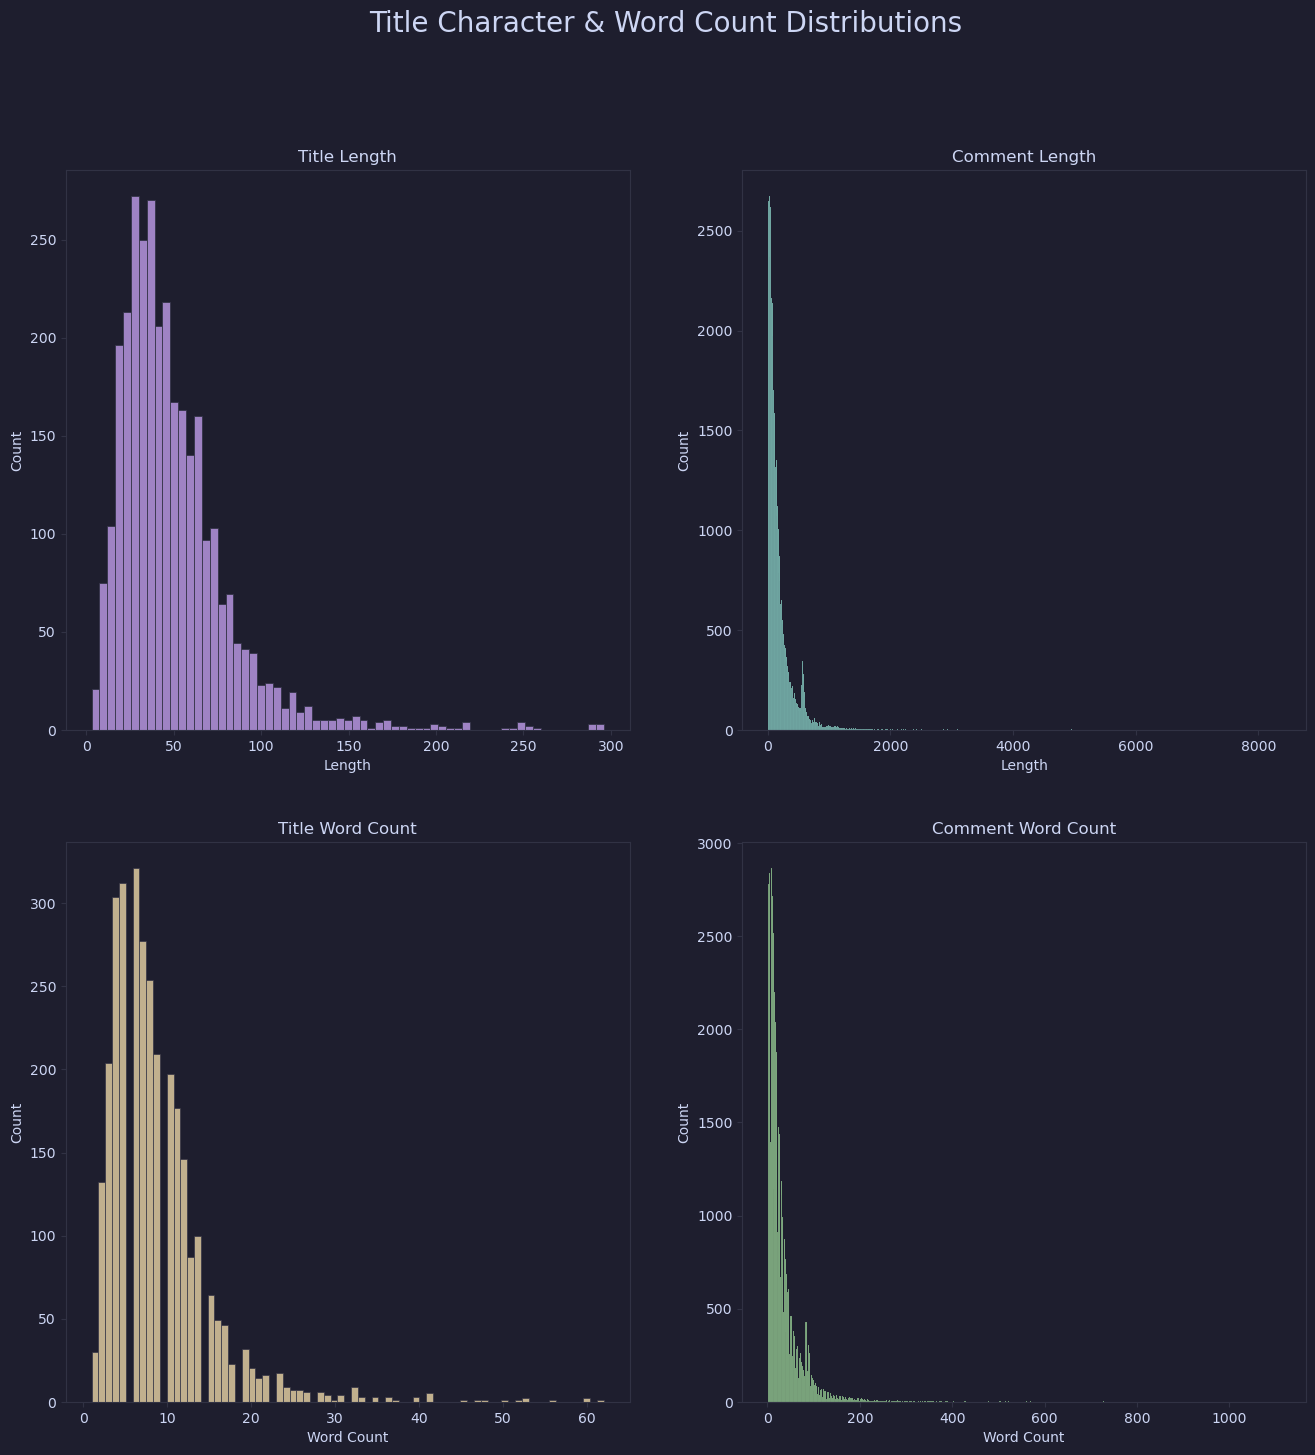

In [156]:
color = load_color("mocha", "peach")

fig, ax =  plt.subplots(2, 2, figsize=(16,16))
sns.histplot(titles['title_length'], ax=ax[0,0],
             color=load_color("mocha", random.choice(cat_color)))
sns.histplot(comments['comment_length'], ax=ax[0,1],
             color=load_color("mocha", random.choice(cat_color)))
sns.histplot(titles['title_word_count'], ax=ax[1,0],
             color=load_color("mocha", random.choice(cat_color)))
sns.histplot(comments['comment_word_count'], ax=ax[1,1],
             color=load_color("mocha", random.choice(cat_color)))

ax[0,0].set(xlabel='Length', title='Title Length')
ax[0,1].set(xlabel='Length', title='Comment Length')
ax[1,0].set(xlabel='Word Count', title='Title Word Count')
ax[1,1].set(xlabel='Word Count', title='Comment Word Count')

fig.suptitle('Title Character & Word Count Distributions', fontsize=20);

These visuals don't help us much, because the upper ends are drastically bigger than the rest of each respective data set. Let's first look at how the distributions look, filtered by each subreddit.

In [164]:
### Making Filtered Dataframes

sd_titles = titles[titles['subreddit']=='SteamDeck'] 
sd_comments = comments[comments['subreddit']=='SteamDeck']
lg_titles = titles[titles['subreddit']=='linux_gaming']
lg_comments = comments[comments['subreddit']=='linux_gaming']

### Title Plots

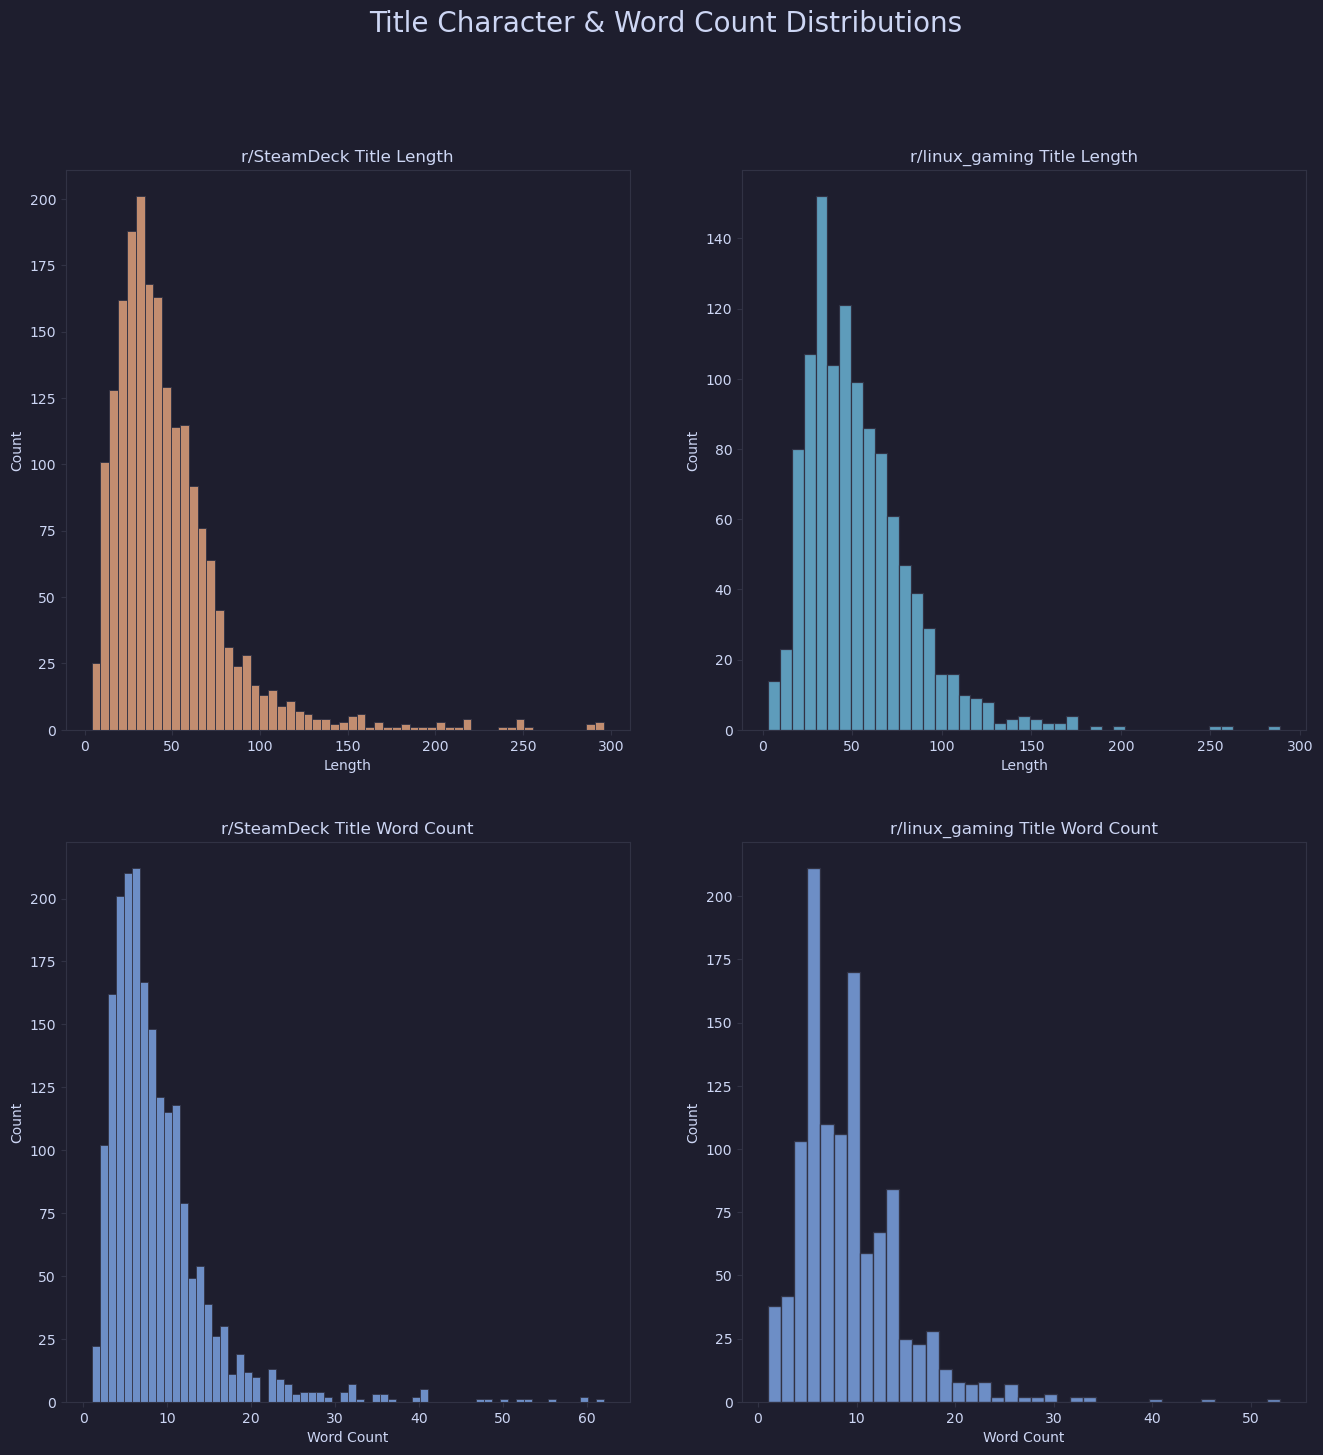

In [166]:
fig, ax =  plt.subplots(2, 2, figsize=(16,16))

# r/SteamDeck Title's Lengths
sns.histplot(sd_titles['title_length'], ax=ax[0,0],
             color=load_color("mocha", random.choice(cat_color)))

# r/linux_gaming Title's Lengths
sns.histplot(lg_titles['title_length'], ax=ax[0,1],
             color=load_color("mocha", random.choice(cat_color)))

# r/SteamDeck Title's Word Counts
sns.histplot(sd_titles['title_word_count'], ax=ax[1,0],
             color=load_color("mocha", random.choice(cat_color)))

# r/linux_gaming Title's Word Counts
sns.histplot(lg_titles['title_word_count'], ax=ax[1,1],
             color=load_color("mocha", random.choice(cat_color)))

ax[0,0].set(xlabel='Length', title='r/SteamDeck Title Length')
ax[0,1].set(xlabel='Length', title='r/linux_gaming Title Length')
ax[1,0].set(xlabel='Word Count', title='r/SteamDeck Title Word Count')
ax[1,1].set(xlabel='Word Count', title='r/linux_gaming Title Word Count')

fig.suptitle('Title Character & Word Count Distributions', fontsize=20);

### Comment Plots

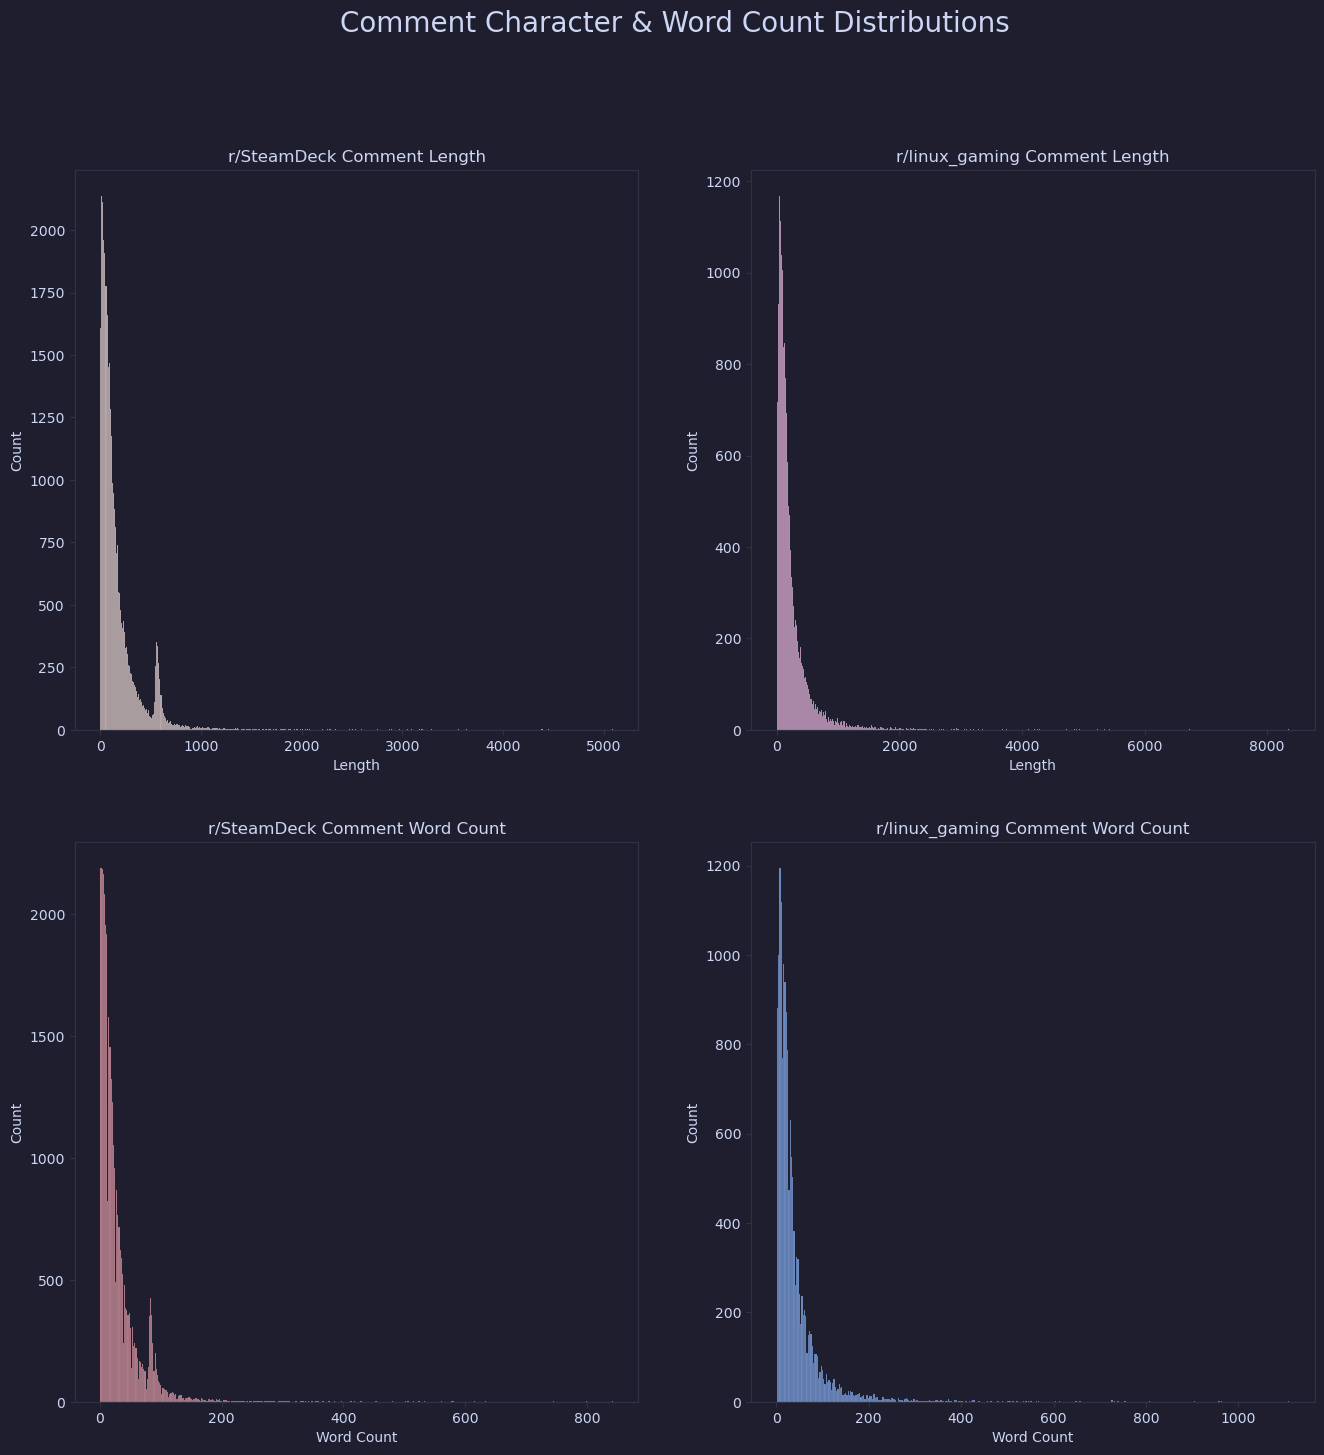

In [167]:
fig, ax =  plt.subplots(2, 2, figsize=(16,16))

# /SteamDeck Comment's Lengths
sns.histplot(sd_comments['comment_length'], ax=ax[0,0],
             color=load_color("mocha", random.choice(cat_color)))

# /linux_gaming Comment's Lengths
sns.histplot(lg_comments['comment_length'], ax=ax[0,1],
             color=load_color("mocha", random.choice(cat_color)))

# /SteamDeck Comment's Word Counts
sns.histplot(sd_comments['comment_word_count'], ax=ax[1,0],
             color=load_color("mocha", random.choice(cat_color)))

# /linux_gaming Comment's Word Counts
sns.histplot(lg_comments['comment_word_count'], ax=ax[1,1],
             color=load_color("mocha", random.choice(cat_color)))

ax[0,0].set(xlabel='Length', title='r/SteamDeck Comment Length')
ax[0,1].set(xlabel='Length', title='r/linux_gaming Comment Length')
ax[1,0].set(xlabel='Word Count', title='r/SteamDeck Comment Word Count')
ax[1,1].set(xlabel='Word Count', title='r/linux_gaming Comment Word Count')

fig.suptitle('Comment Character & Word Count Distributions', fontsize=20);

Even though r/linux_gaming has less data overall, we are seeeing more representation from it in the longer comments. 

## Recap

### RegEx
When we begin to proccess the data for modeling we should make sure to use RegEx to help us deal with various writing patterns, including:
- Using `/` to alternate different words that can fit in same place of a sentance.
- Using `-` to combine words together
- URLs of various popular websites

### Differences in length
Although the two subreddits have fairly similar distributions, there are some noteworthy differences. r/SteamDeck seems to favor shorter length in titles and r/linux_gaming seems to favor longer comments. 

## Word EDA

We will now vectorize the words in the dataset and do some EDA on the words themselves that appear.

In [170]:
cv = CountVectorizer(stop_words='english')

sd_titles_vect = cv.fit_transform(sd_titles['title'])
sd_titles_vect_df = pd.DataFrame(sd_titles_vect.todense(), columns=cv.get_feature_names_out())

lg_titles_vect = cv.fit_transform(lg_titles['title'])
lg_titles_vect_df = pd.DataFrame(lg_titles_vect.todense(), columns=cv.get_feature_names_out())

sd_comments_vect = cv.fit_transform(sd_comments['comments'])
sd_comments_vect_df = pd.DataFrame(sd_comments_vect.todense(), columns=cv.get_feature_names_out())

lg_comments_vect = cv.fit_transform(lg_comments['comments'])
lg_comments_vect_df = pd.DataFrame(lg_comments_vect.todense(), columns=cv.get_feature_names_out())

### Top 10 Most Common Words in Titles

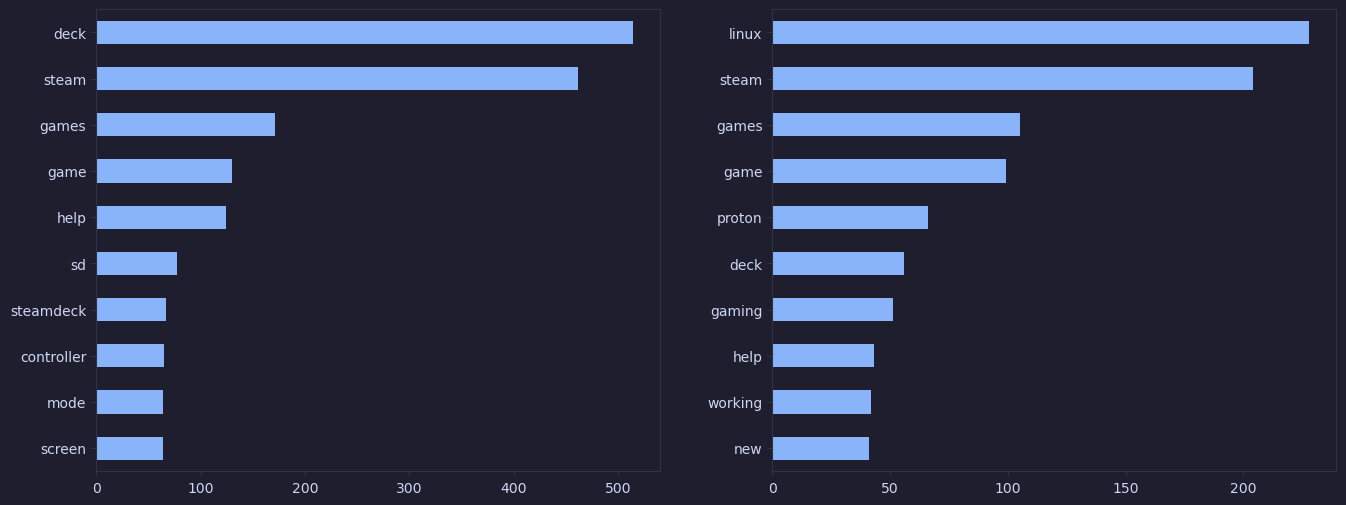

In [173]:
# Right Plot is r/SteamDeck and Left Plot is r/linux_gaming
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sd_titles_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0])
lg_titles_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1])

ax[0].invert_yaxis()
ax[1].invert_yaxis();

### Top 10 Most Common Words in Comments

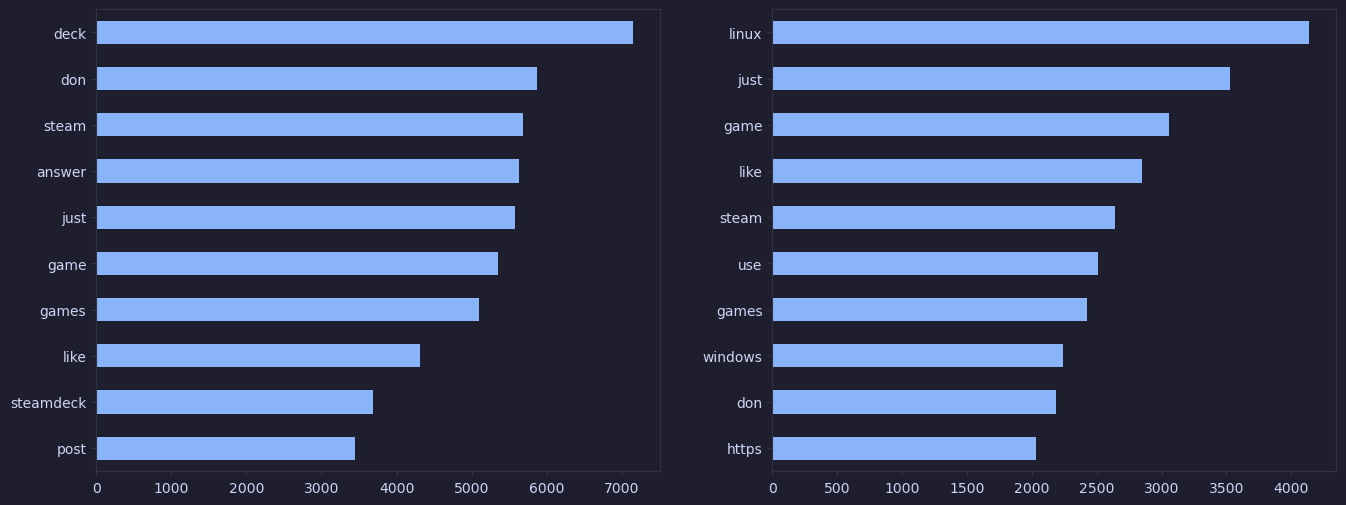

In [174]:
# Right Plot is r/SteamDeck and Left Plot is r/linux_gaming
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sd_comments_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0])
lg_comments_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1])

ax[0].invert_yaxis()
ax[1].invert_yaxis();

## Bigrams

In [176]:
cv = CountVectorizer(stop_words='english', ngram_range=(2,2), max_features=1000)

sd_titles_vect = cv.fit_transform(sd_titles['title'])
sd_titles_vect_df = pd.DataFrame(sd_titles_vect.todense(), columns=cv.get_feature_names_out())

lg_titles_vect = cv.fit_transform(lg_titles['title'])
lg_titles_vect_df = pd.DataFrame(lg_titles_vect.todense(), columns=cv.get_feature_names_out())

sd_comments_vect = cv.fit_transform(sd_comments['comments'])
sd_comments_vect_df = pd.DataFrame(sd_comments_vect.todense(), columns=cv.get_feature_names_out())

lg_comments_vect = cv.fit_transform(lg_comments['comments'])
lg_comments_vect_df = pd.DataFrame(lg_comments_vect.todense(), columns=cv.get_feature_names_out())

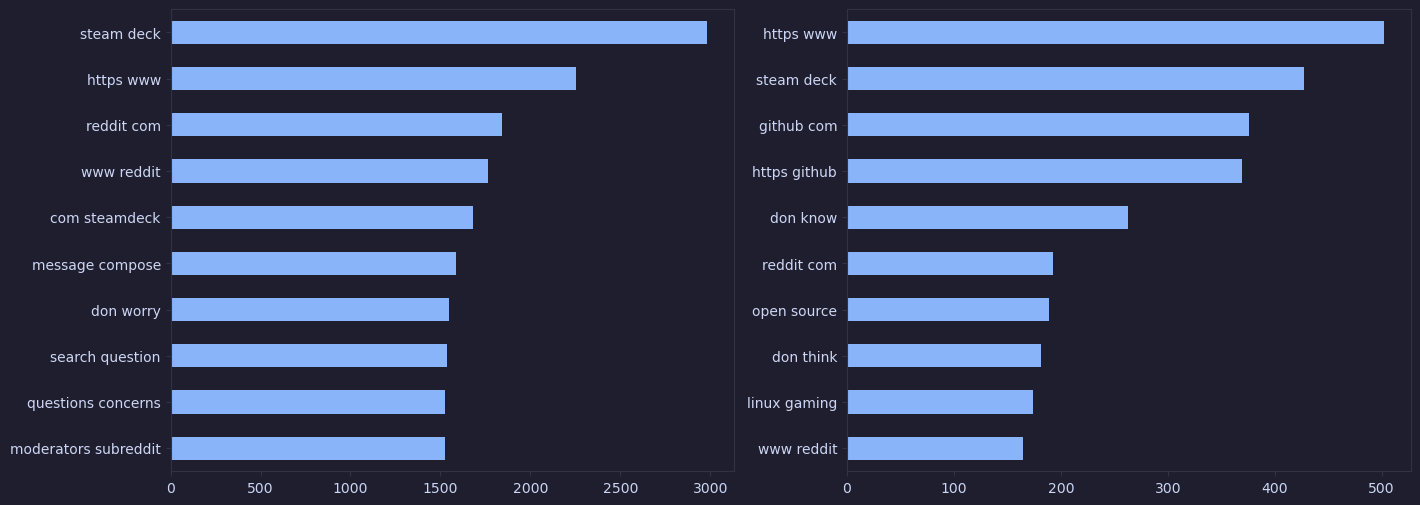

In [177]:
# Right Plot is r/SteamDeck and Left Plot is r/linux_gaming
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sd_comments_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0])
lg_comments_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1])

ax[0].invert_yaxis()
ax[1].invert_yaxis();